In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.shape

(100000, 9)

In [6]:
diab_num = df[['age','bmi','HbA1c_level','blood_glucose_level']]
diab_num.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [7]:
df.isnull().sum()
#No null values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.duplicated().sum()
# 3854 duplicate values

3854

In [9]:
df=df.drop_duplicates()
print(f"No. of Duplicate rows after deletion: {df.duplicated().sum()}")

No. of Duplicate rows after deletion: 0


## EDA

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())
print("--"*35)

print("Categories in 'smoking_history' variable:  ",end=" ")
print(df['smoking_history'].unique())
print("--"*35)

print("Categories in'heart_disease ' variable:",end=" " )
print(df['heart_disease'].unique())
print("--"*35)

print("Categories in'diabetes ' variable:",end=" " )
print(df['diabetes'].unique())
print("--"*35)

print("Categories in'bmi' variable:",end=" " )
print(df['bmi'].unique())
print("--"*35)


Categories in 'gender' variable:      ['Female' 'Male' 'Other']
----------------------------------------------------------------------
Categories in 'smoking_history' variable:   ['never' 'No Info' 'current' 'former' 'ever' 'not current']
----------------------------------------------------------------------
Categories in'heart_disease ' variable: [1 0]
----------------------------------------------------------------------
Categories in'diabetes ' variable: [0 1]
----------------------------------------------------------------------
Categories in'bmi' variable: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
----------------------------------------------------------------------


In [11]:
# Value Counts

print("Value Count in 'gender' variable:     \n",end=" " )
print(df['gender'].value_counts())
print("--"*35)
print("Value Count in 'smoking_history' variable:  \n",end=" ")
print(df['smoking_history'].value_counts())
print("--"*35)
print("Value Count in'heart_disease ' variable:\n",end=" " )
print(df['heart_disease'].value_counts())
print("--"*35)
print("Value Count in'diabetes ' variable:\n",end=" " )
print(df['diabetes'].value_counts())



Value Count in 'gender' variable:     
 Female    56161
Male      39967
Other        18
Name: gender, dtype: int64
----------------------------------------------------------------------
Value Count in 'smoking_history' variable:  
 never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64
----------------------------------------------------------------------
Value Count in'heart_disease ' variable:
 0    92223
1     3923
Name: heart_disease, dtype: int64
----------------------------------------------------------------------
Value Count in'diabetes ' variable:
 0    87664
1     8482
Name: diabetes, dtype: int64


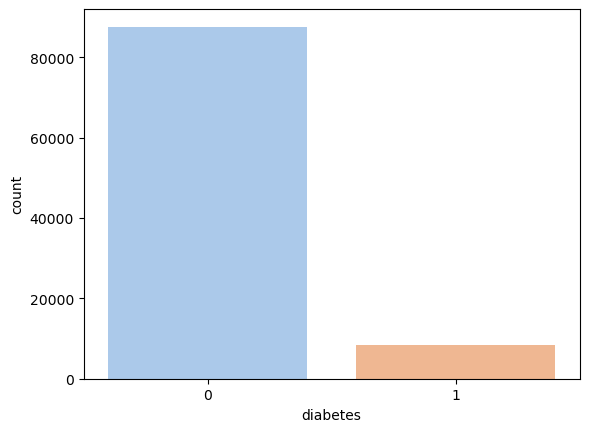

In [12]:
sns.set_palette("pastel")
sns.countplot(x=df['diabetes'],data=df)
plt.show()

In [23]:
df2=df[['hypertension','age','diabetes','smoking_history']]

<Figure size 1200x1200 with 0 Axes>

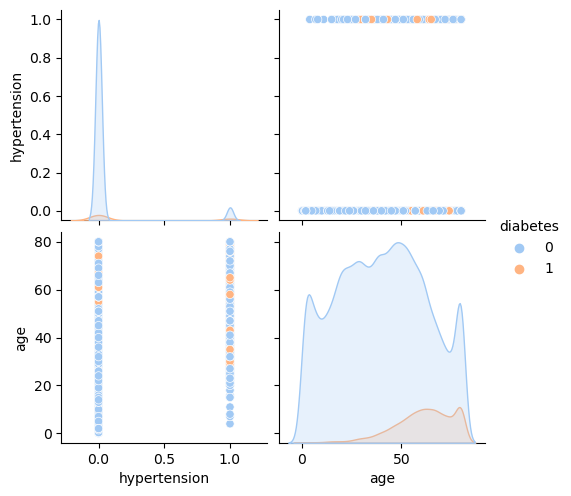

<Figure size 1200x1200 with 0 Axes>

In [41]:
sns.pairplot(df2,hue='diabetes')
plt.figure(figsize=(12,12))

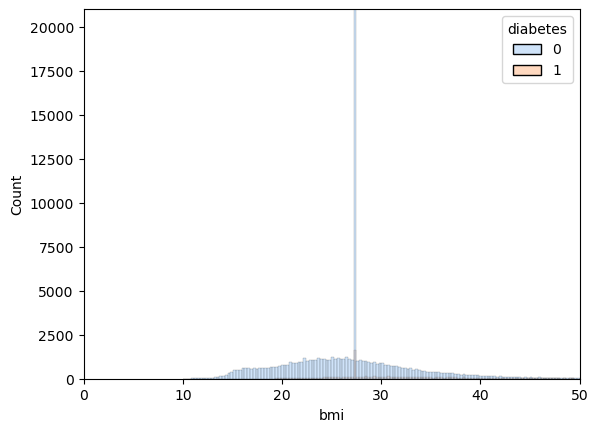

In [25]:
sns.histplot(data=df,x='bmi',hue='diabetes')
plt.xlim(0,50)
plt.ylim(0,21000)
plt.show()

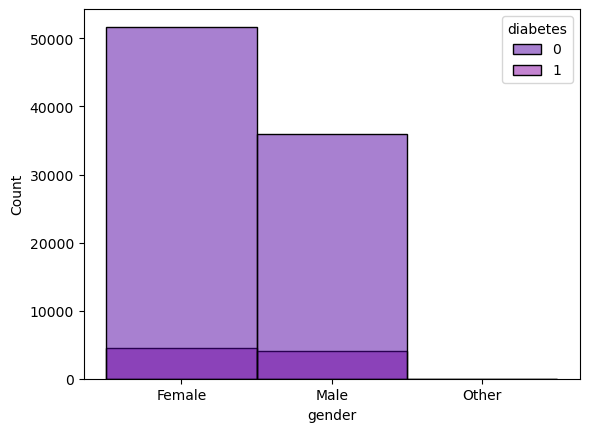

In [26]:
sns.set_palette("plasma")
sns.histplot(data=df,x='gender',hue='diabetes')
plt.show()
#this shows that gender column has other as a value as well

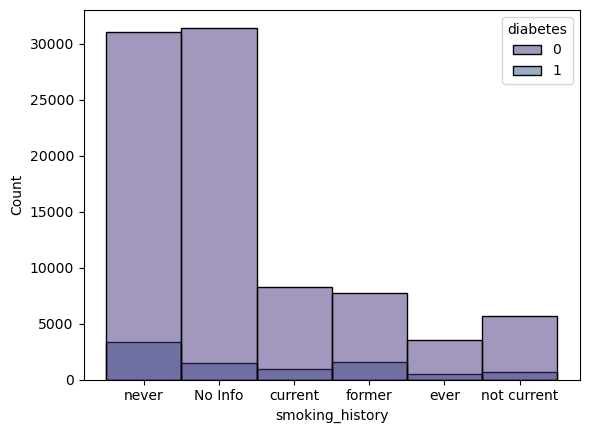

In [27]:
sns.set_palette("viridis")
sns.histplot(data=df,x='smoking_history',hue='diabetes')
plt.show()

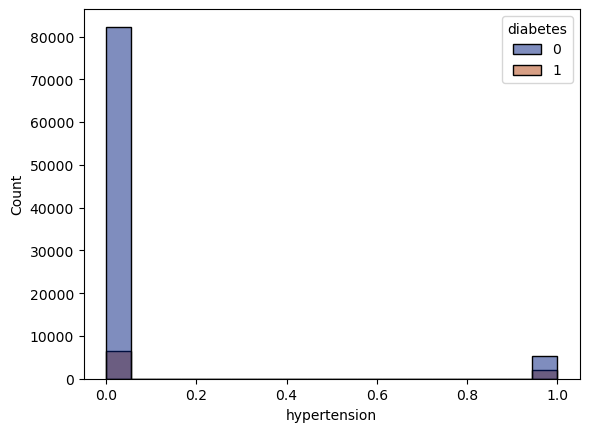

In [28]:
sns.set_palette("dark")
sns.histplot(data=df,x='hypertension',hue='diabetes')
plt.show()

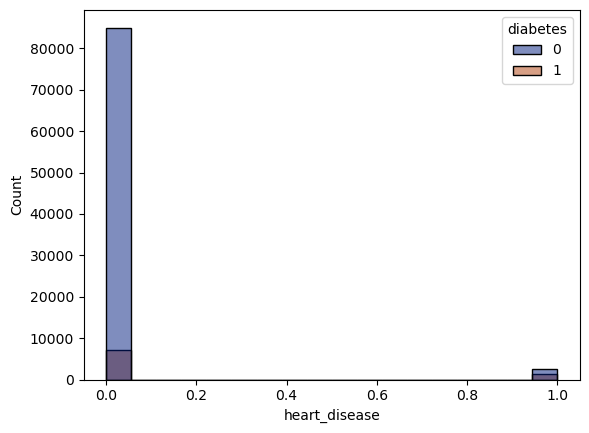

In [29]:
sns.histplot(data=df,x='heart_disease',hue='diabetes')
plt.show()

In [30]:
df['HbA1c_level'].sort_values().value_counts()

6.6    8164
5.7    8124
6.5    8051
5.8    7992
6.0    7988
6.2    7958
6.1    7716
3.5    7319
4.8    7296
4.5    7290
4.0    7205
5.0    7155
8.8     660
8.2     659
9.0     652
6.8     642
7.5     642
7.0     633
Name: HbA1c_level, dtype: int64

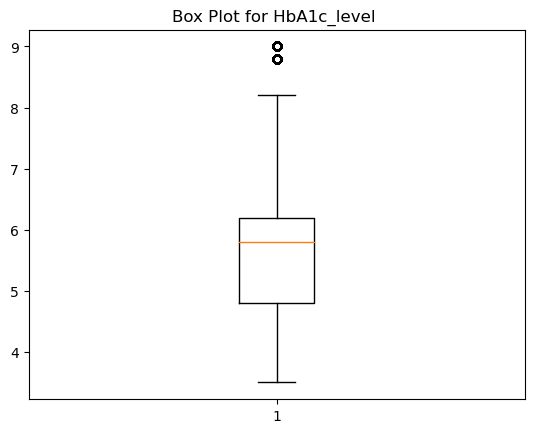

In [11]:
plt.title("Box Plot for HbA1c_level ")
plt.boxplot(df['HbA1c_level'])
plt.show()
#looks like we have some outliers but based on the dataset knowledge it is not advised to drop them

In [13]:
mean = df['HbA1c_level'].mean()
std  = df['HbA1c_level'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['HbA1c_level'] >= lower_bound) 
                & (df['HbA1c_level'] <= upper_bound)]

Lower Bound : 3.386144689585367
Upper Bound : 7.6790727921611435


In [14]:
df.shape

(94175, 9)

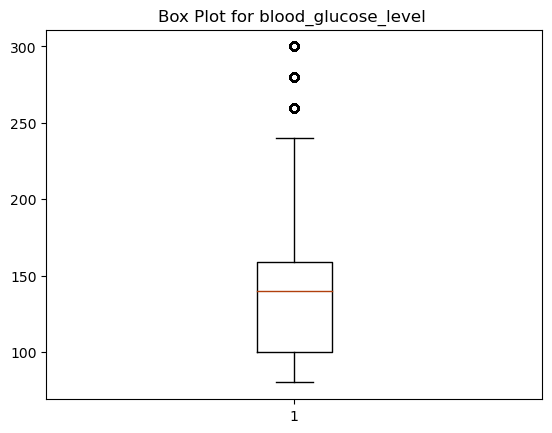

In [43]:
plt.title("Box Plot for blood_glucose_level ")
plt.boxplot(df['blood_glucose_level'])
plt.show()
#looks like we have some outliers but based on the dataset it is not advised to drop them

In [15]:
mean = df['blood_glucose_level'].mean()
std  = df['blood_glucose_level'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df = df[(df['blood_glucose_level'] >= lower_bound) 
                & (df['blood_glucose_level'] <= upper_bound)]

Lower Bound : 56.33484812140115
Upper Bound : 220.20244869912892


In [16]:
df.shape

(92572, 9)

In [17]:
#dropping other variabe in Gender since it has only 18 entries
df=df[df['gender']!= 'Other']

In [18]:
df.gender.value_counts()
#dropped successfully

gender
Female    54311
Male      38243
Name: count, dtype: int64

In [15]:
#df = df[df['smoking_history']!='No Info']

In [19]:
df.shape

(92554, 9)

In [20]:
df['age'] = df['age'].astype(int)

In [21]:
df['age']

0        80
1        54
2        28
3        36
4        76
         ..
99994    36
99996     2
99997    66
99998    24
99999    57
Name: age, Length: 92554, dtype: int32

In [22]:
df = df[df['age']!=0]

In [23]:
df.shape

(92554, 9)

UNIVARIATE ANALYSIS

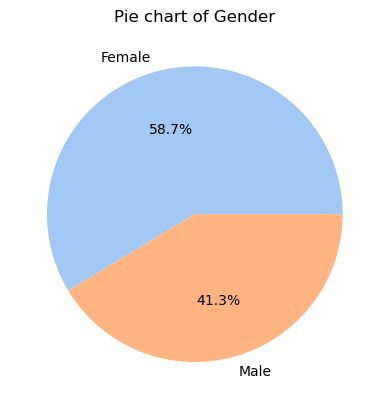

In [21]:
sns.set_palette("pastel")
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of Gender')
plt.show()

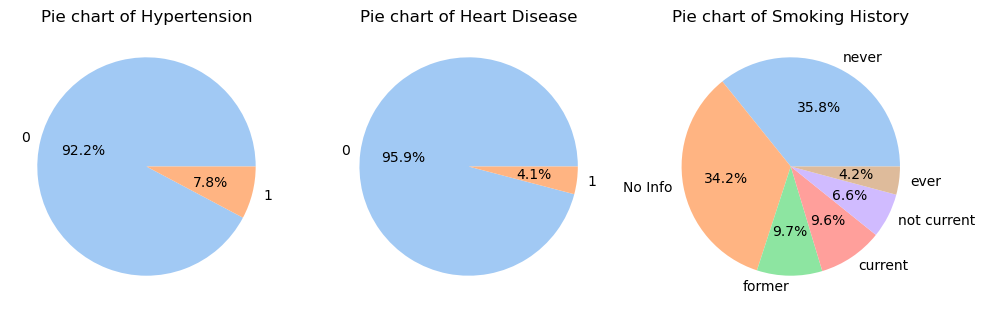

In [39]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
axes[0].pie(df['hypertension'].value_counts(),labels=df['hypertension'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Pie chart of Hypertension')
axes[1].pie(df['heart_disease'].value_counts(),labels=df['heart_disease'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Pie chart of Heart Disease')
axes[2].pie(df['smoking_history'].value_counts(),labels=df['smoking_history'].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Pie chart of Smoking History')
plt.tight_layout()
plt.show()

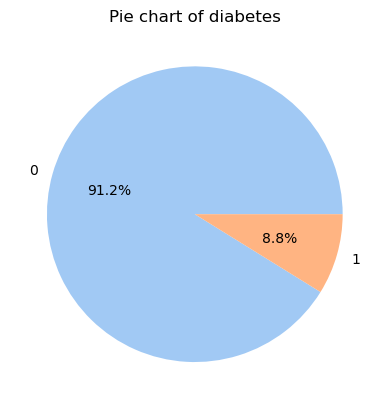

In [40]:
plt.pie(df['diabetes'].value_counts(),labels=df['diabetes'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of diabetes')
plt.show()

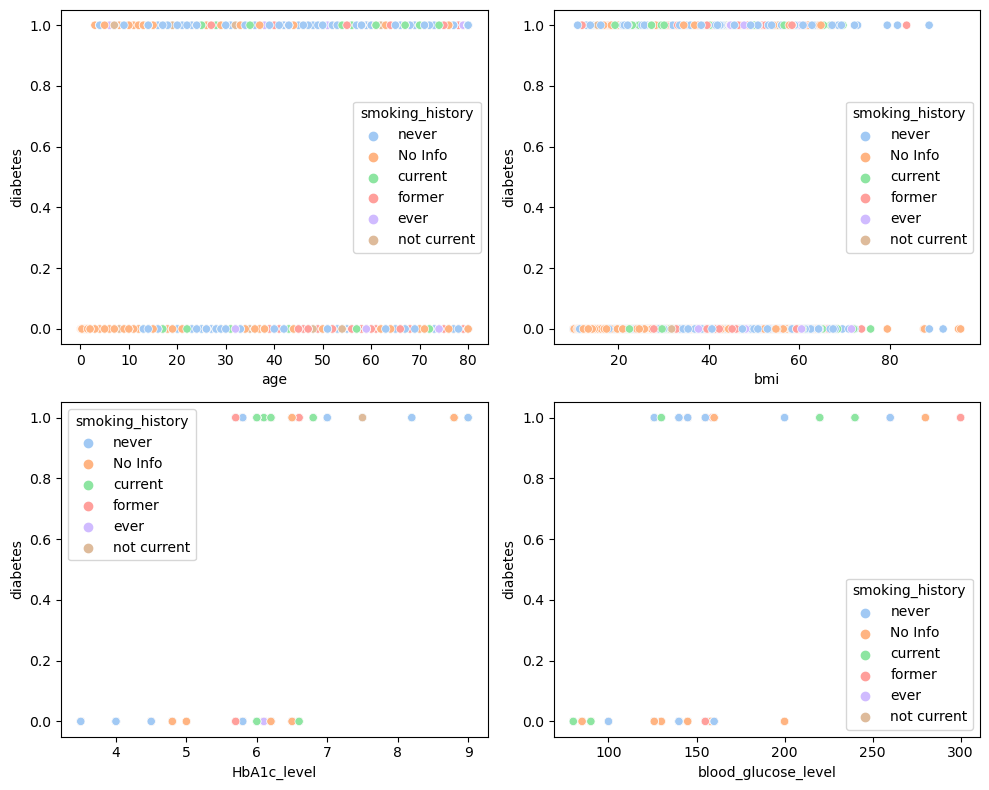

In [42]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=df,x='age',y='diabetes',hue=df['smoking_history'],ax=axes[0,0])
sns.scatterplot(data=df,x='bmi',y='diabetes',hue=df['smoking_history'],ax=axes[0,1])
sns.scatterplot(data=df,x='HbA1c_level',y='diabetes',hue=df['smoking_history'],ax=axes[1,0])
sns.scatterplot(data=df,x='blood_glucose_level',y='diabetes',hue=df['smoking_history'],ax=axes[1,1])
plt.tight_layout()
plt.show()

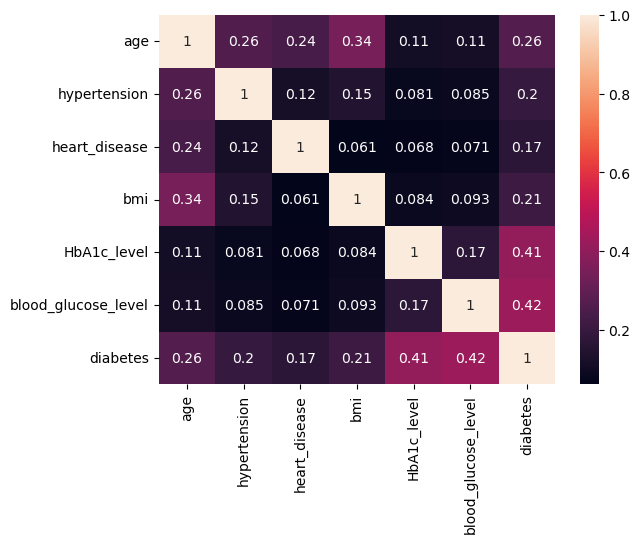

In [44]:
# CORRELATION MATRIX

b_num = df.select_dtypes(exclude='object')
corr_diab = b_num.corr()
sns.heatmap(corr_diab,annot=True)
plt.show()

BIVARIATE ANALYSIS

In [45]:
gender_g = df.groupby(['gender','diabetes']).size().unstack()
hyper_g = df.groupby(['hypertension','diabetes']).size().unstack()
heart_g = df.groupby(['heart_disease','diabetes']).size().unstack()
smoke_g = df.groupby(['smoking_history','diabetes']).size().unstack()

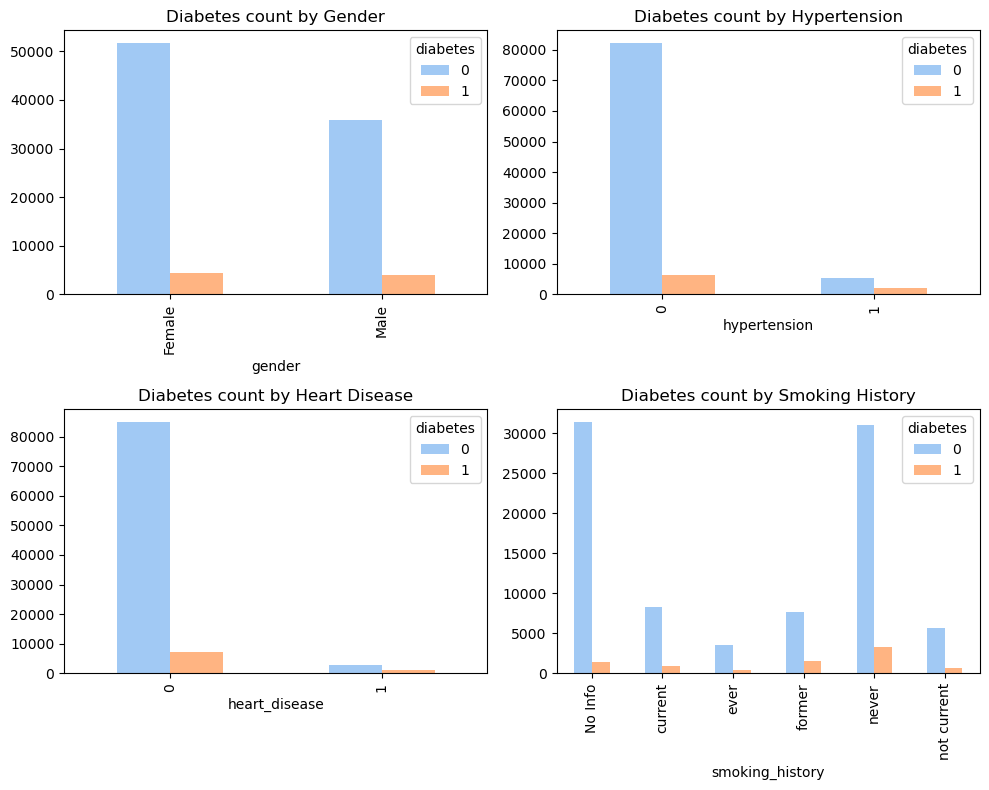

In [53]:
sns.set_palette("pastel")
fig,axes = plt.subplots(2,2,figsize=(10,8))
gender_g.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Diabetes count by Gender')
hyper_g.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Diabetes count by Hypertension')
heart_g.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Diabetes count by Heart Disease')
smoke_g.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Diabetes count by Smoking History')
plt.tight_layout()
plt.show()


DATA DISTRIBUTION

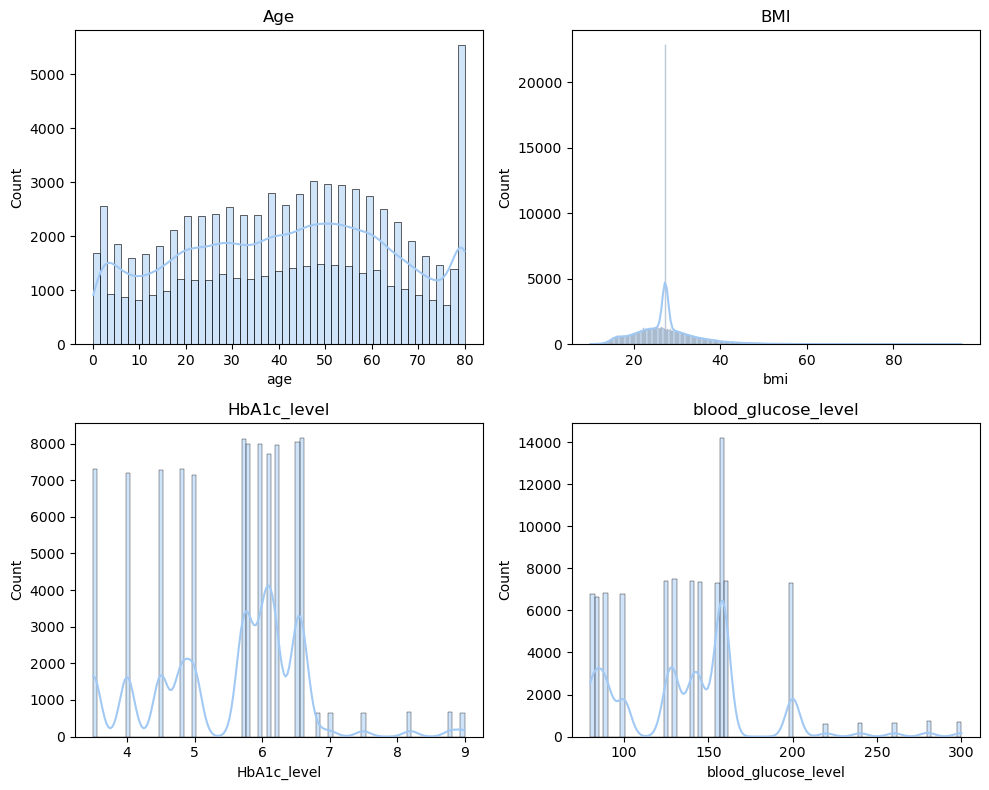

In [75]:
# DATA Distibution of Numerical columns
sns.set_palette("pastel")
fig,axes = plt.subplots(2,2,figsize=(10,8))
feature_data_age=df['age']
sns.histplot(feature_data_age, kde=True,ax=axes[0,0])
axes[0,0].set_title('Age')

feature_data_bmi=df['bmi']
sns.histplot(feature_data_bmi, kde=True,ax=axes[0,1])
axes[0,1].set_title('BMI')

feature_data_HbA1c_level=df['HbA1c_level']
sns.histplot(feature_data_HbA1c_level, kde=True,ax=axes[1,0])
axes[1,0].set_title('HbA1c_level')

feature_data_blood_glucose_level=df['blood_glucose_level']
sns.histplot(feature_data_blood_glucose_level, kde=True,ax=axes[1,1])
axes[1,1].set_title('blood_glucose_level')

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import shapiro
for feature_name in ['bmi', 'HbA1c_level', 'blood_glucose_level', 'age']:
    statistic, p_value = shapiro(df[feature_name])
    print("Shapiro-Wilk Test for", feature_name)
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("The data does not follow a normal distribution.")
    else:
        print("The data follows a normal distribution.")
    print("--"*30)    

Shapiro-Wilk Test for bmi
Test Statistic: 0.9307443030100548
p-value: 7.613800263089906e-101
The data does not follow a normal distribution.
------------------------------------------------------------
Shapiro-Wilk Test for HbA1c_level
Test Statistic: 0.9278827968870353
p-value: 6.740091585965568e-102
The data does not follow a normal distribution.
------------------------------------------------------------
Shapiro-Wilk Test for blood_glucose_level
Test Statistic: 0.9202305562029525
p-value: 1.519656360622638e-104
The data does not follow a normal distribution.
------------------------------------------------------------
Shapiro-Wilk Test for age
Test Statistic: 0.9692390439974848
p-value: 6.507047485184178e-81
The data does not follow a normal distribution.
------------------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 92554.
  res = hypotest_fun_out(*samples, **kwds)


MODEL

In [25]:
df.head()
# We can see that there are textual data as well which needs to be converted to Numerical part for model Building

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [26]:
#Performing one hot encoding

df2=df.copy()

In [27]:
df2 = pd.get_dummies(data=df2, drop_first=True)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,54,0,0,27.32,6.6,80,0,False,False,False,False,False,False
2,28,0,0,27.32,5.7,158,0,True,False,False,False,True,False
3,36,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,76,1,1,20.14,4.8,155,0,True,True,False,False,False,False


In [28]:
df2.columns
#gender female column has been dropped out since it is beimg merged in gender male only as 0 and 1

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [29]:
df2.shape

(92554, 13)

In [30]:
# Need to scale the data since there are various parameters used here and since data doesn't follow Normal distribution we use Min Max Scaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
columns_to_scale = ['age', 'bmi','HbA1c_level','blood_glucose_level']
scaler.fit(df2[columns_to_scale])
scaled_columns = scaler.transform(df2[columns_to_scale])
df2[columns_to_scale] = scaled_columns

In [31]:
df2.head()
#We have reduced them to the range of zero to 1

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,0.563636,0.428571,0,False,False,False,False,True,False
1,0.670886,0,0,0.202031,0.563636,0.000000,0,False,False,False,False,False,False
2,0.341772,0,0,0.202031,0.400000,0.557143,0,True,False,False,False,True,False
3,0.443038,0,0,0.156863,0.272727,0.535714,0,False,True,False,False,False,False
4,0.949367,1,1,0.118231,0.236364,0.535714,0,True,True,False,False,False,False


In [32]:
# Separation of Labels
X = df2.drop(['diabetes'], axis = 1)
y = df2['diabetes']

WITHOUT GRID SEARCH

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
X_test.shape,X_train.shape

((23139, 12), (69415, 12))

In [36]:
y_test.shape,y_train.shape

((23139,), (69415,))

In [37]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [1]:
models = {
    
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors = 5, weights ='uniform'),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=10),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=60, random_state=10),
    "Gradient Boosting Classifier":GradientBoostingClassifier(random_state=20), 
    "SVC LINEAR": SVC(kernel="linear")
}

NameError: name 'KNeighborsClassifier' is not defined

In [39]:
models

{'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(),
 'Decision Tree Classifier': DecisionTreeClassifier(random_state=10),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=60, random_state=10),
 'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=20),
 'SVC LINEAR': SVC(kernel='linear')}

In [43]:
from sklearn.metrics import accuracy_score, classification_report

predicted = []
mod = []
recall_value = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    mod.append(list(models.keys())[i])
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    acc_train = accuracy_score(y_train, y_train_pred)
    print(list(models.keys())[i], ": Train Accuracy =", acc_train * 100, "%")
    print("Classification Report for Training set:")
    print(classification_report(y_train, y_train_pred))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    acc_test = accuracy_score(y_test, y_test_pred)
    print(list(models.keys())[i], ": Test Accuracy =", acc_test * 100, "%")
    print("Classification Report for Test set:")
    print(classification_report(y_test, y_test_pred))
    
    print('----------------------------------')
    rcc_test = recall_score(y_test, y_test_pred,average='macro')
    
    predicted.append(acc_test * 100)
    recall_value.append(rcc_test * 100)

    print('=' * 35)
    print('\n')


Logistic Regression
Model performance for Training set
Logistic Regression : Train Accuracy = 95.98501764748252 %
Classification Report for Training set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     65002
           1       0.85      0.45      0.59      4413

    accuracy                           0.96     69415
   macro avg       0.90      0.72      0.78     69415
weighted avg       0.96      0.96      0.95     69415

----------------------------------
Model performance for Test set
Logistic Regression : Test Accuracy = 96.01106357232379 %
Classification Report for Test set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21734
           1       0.83      0.43      0.57      1405

    accuracy                           0.96     23139
   macro avg       0.90      0.71      0.77     23139
weighted avg       0.96      0.96      0.95     23139

--------------------------------

In [46]:
data = pd.DataFrame({'Model': mod, 'Accuracy': predicted})
data

,Model,Accuracy
0,Logistic Regression,96.011064
1,K-Neighbors Classifier,95.864126
2,Decision Tree Classifier,94.800985
3,Random Forest Classifier,96.905657
4,Gradient Boosting Classifier,97.104456
5,SVC LINEAR,95.894377


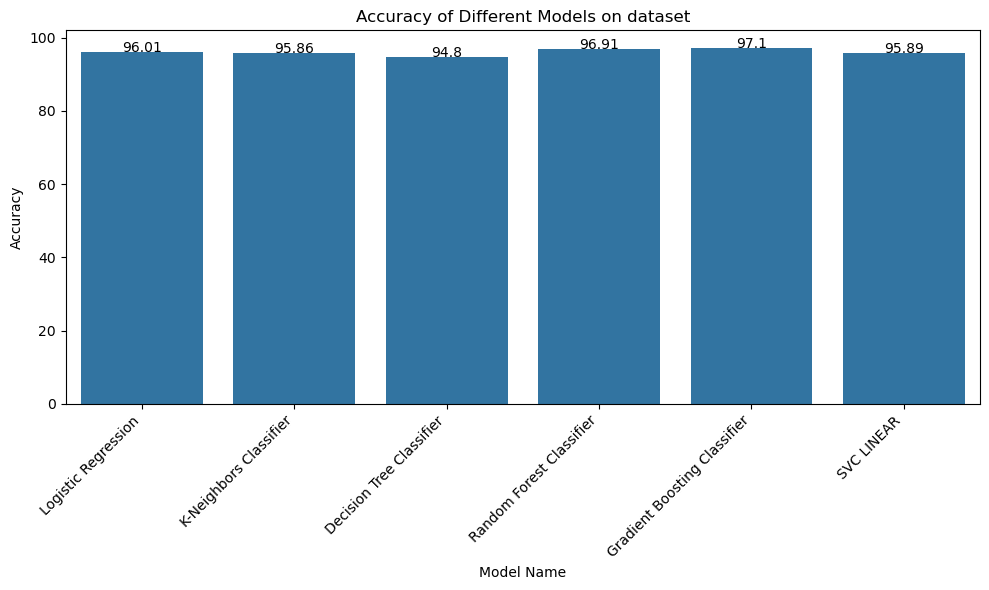

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data)

for index, row in data.iterrows():
    plt.text(index, row['Accuracy'], round(row['Accuracy'], 2), color='black', ha="center")

plt.xticks(rotation=45, ha='right')

plt.title('Accuracy of Different Models on dataset')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

`Prediction Model`

In [30]:
import pickle

In [31]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [32]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')